## Classification Accuracy
   - Prime Indian Diabetes dataset from the UCI ML Repository

In [1]:
# Read the data into a pandas DataFrame
import pandas as pd
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

In [2]:
# Print the first 5 rows
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Define X and y
feature_cols=['pregnant','insulin','bmi','age']
X=pima[feature_cols]
y=pima.label

In [4]:
# Split the data into training and testing data set
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

C:\Users\UJJWAL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# Train a logestic regression model on the training data set
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# Make predections on the testing data set
y_pred=logreg.predict(X_test)

## Classification accuracy
   - percentage of correct predctions

In [7]:
# Calculate accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred))

0.6927083333333334


## Null accuracy: Accuracy that could be acheived by always predicting the most frequent class

In [8]:
# Examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [9]:
# Calculate the percentages of ones
y_test.mean()

0.3229166666666667

In [10]:
# Calculate the percentages of zeros
1-y_test.mean()

0.6770833333333333

In [11]:
# Calculate the null accuracy (for binary classification problem coded as 0/1)
max(y_test.mean(),1-y_test.mean())

0.6770833333333333

In [12]:
# Calculate the null accuracy for multiclass
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

In [13]:
# Comparing the true and predicted response values
print ('True:',y_test.values[0:25])
print ('True:',y_pred[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
True: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Confusion matrix

In [14]:
# Important: first argument is the true value and second argument is the predicted value
print (metrics.confusion_matrix(y_test,y_pred))

[[118  12]
 [ 47  15]]


In [15]:
# Save confusion matrix and slice into four pieces
confusion=metrics.confusion_matrix(y_test,y_pred)
TP=confusion[1,1]
FP=confusion[0,1]
TN=confusion[0,0]
FN=confusion[1,0]

## Metrics computed from a confusion matrix

In [16]:
# Classification accuracy: Overall, how often is the classifier correct?
print((TP+TN)/float(TP+FP+TN+FN))
print(metrics.accuracy_score(y_test,y_pred))

0.6927083333333334
0.6927083333333334


In [17]:
# Classification Error/Missclassification: Overall, how often is the classifier incorrect?
print((FP+FN)/float(TP+FP+TN+FN))
print(1-metrics.accuracy_score(y_test,y_pred))

0.3072916666666667
0.30729166666666663


In [18]:
# True positive rate/Specificity/Recall: When actual is positive,how often is the prediction correct?
print(TP/float(TP+FN))
print(metrics.recall_score(y_test,y_pred))

0.24193548387096775
0.24193548387096775


In [19]:
# True negative rate/Specificity:When actual is negative,how often is the prediction correct?
print(TN/float(TN+FP))

0.9076923076923077


In [20]:
# False positive rate: When actual is negative,how often is the prediction incorrect?
print(FP/float(TN+FP))

0.09230769230769231


In [21]:
# Precision: When predicted positive, how often the prediction is correct?
print(TP/float(TP+FP))
print(metrics.precision_score(y_test,y_pred))

0.5555555555555556
0.5555555555555556


In [22]:
# Adjusting the classification threshold
# Print the first 10 predicted responses
print(logreg.predict(X_test)[0:10])

[0 0 0 0 0 0 0 1 0 1]


In [23]:
# Print the first 10 predicted probabilities of class membership
print(logreg.predict_proba(X_test)[0:10,:])

[[0.63247571 0.36752429]
 [0.71643656 0.28356344]
 [0.71104114 0.28895886]
 [0.5858938  0.4141062 ]
 [0.84103973 0.15896027]
 [0.82934844 0.17065156]
 [0.50110974 0.49889026]
 [0.48658459 0.51341541]
 [0.72321388 0.27678612]
 [0.32810562 0.67189438]]


In [24]:
# Print the first 10 predicted probabilities for class 1
print(logreg.predict_proba(X_test)[0:10,1])

[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438]


In [25]:
# Store the predicted probabilities for class 1
y_pred_prob=logreg.predict_proba(X_test)[:,1]

Text(0,0.5,'Frequency')

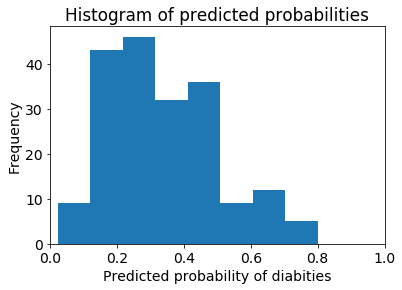

In [26]:
# Allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

# Histogram of predicted probabilities
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabities')
plt.ylabel('Frequency')

## Decrease the threshold for predicting diabities in order to increase the sensitivity of the classifier

In [27]:
# Predict diabetes if the predicted probability is greater that 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [28]:
# Print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [29]:
# Print the first 10 predicted classes with lower threshold
y_pred_class[1:10]

array([0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [30]:
# Previous confusion matrix (default threshold of 0.5)
print (confusion)

[[118  12]
 [ 47  15]]


In [31]:
# New confusion matrix (threshold of 0.3)
print (metrics.confusion_matrix(y_test,y_pred_class))

[[80 50]
 [16 46]]


In [32]:
# Sensitivity has increased (used to be 0.24)
print(46/float(46+16))

0.7419354838709677


In [33]:
# Specificity has decreased (used to be 0.91)
print(80/float(80+50))

0.6153846153846154


# ROC curve and Area under the curve (AUC)
   - Question: Wouldnt it be nice if we could see how sensitivity ans specificity are affected by various thresholds,
        without actually changing the threshold?
    - Answer: Plot the ROC curve
        

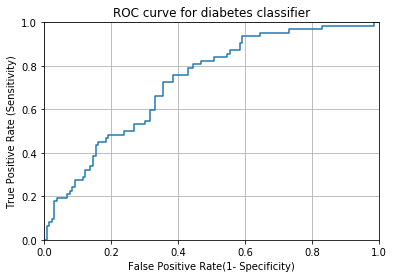

In [34]:
# Important: first argument is true values, second argument  is predicted probabilities
fpr, tpr, thresholds= metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate(1- Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
# ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense 
# for your particular context

# You can't actually see the threshold used to generate the curve on the ROC curve itself.

In [35]:
# Define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print ('Sensitivity:', tpr[thresholds>threshold][-1])
    print ('Specificity:', 1-fpr[thresholds>threshold][-1])

In [36]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [37]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


## AUC is the percentage of the ROC plot that is underneath the curve
   - AUC is useful as a single number summary of classifier performance.
   - If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier 
     will assign a higher predicted probability to the positive observation.
   - AUC is useful even when there is high class imbalance (unlike classification accuracy)

In [40]:
# Important: first argument is the true value, second argument is the predicted probabilities
print (metrics.roc_auc_score(y_test,y_pred_prob))

0.7245657568238213


In [41]:
# Calculate cross-validation AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg,X,y,cv=10,scoring='roc_auc').mean()

0.7378233618233618

## Confusion matrix advantages:
   - Allows you to calculate a variety of metrics 
   - Useful for multi-class problems(more than two response  classes)
   
## ROC/AUC advantages
    - Does not require you to set a classification threshold
    - Still useful when there is high class imbalance
    